11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 96ms/step - accuracy: 0.8299 - loss: 1.2412 - val_accuracy: 0.9623 - val_loss: 0.3401
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9567 - loss: 0.3480 - val_accuracy: 0.9688 - val_loss: 0.2957
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.9610 - loss: 0.3109 - val_accuracy: 0.9683 - val_loss: 0.2882
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9637 - loss: 0.2972 - val_accuracy: 0.9753 - val_loss: 0.2615
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9637 - loss: 0.2816 - val_accuracy: 0.9673 - val_loss: 0.2643
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9659 - loss: 0.2727 - val_accuracy: 0.9707 - val_loss: 0.2465
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9676 - loss: 0.2613 - val_accuracy: 0.9741 - val_loss: 0.2324
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.9674 - loss: 0.2531 - 

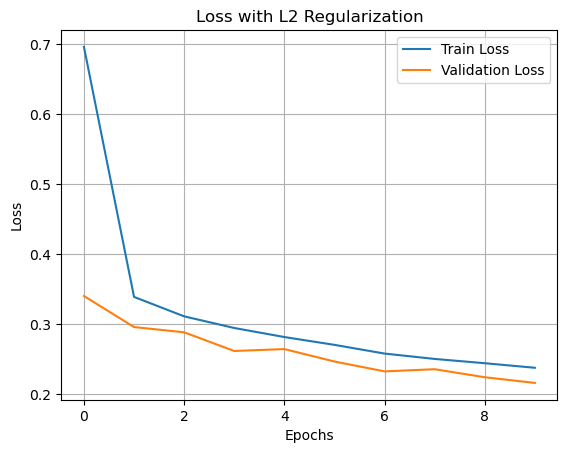

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]  # shape: (60000, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# L2 Regularization strength
l2_lambda = 0.01

# Build a CNN model with L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(l2_lambda),
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(l2_lambda)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_lambda)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test), batch_size=128)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss with L2 Regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
